<a href="https://colab.research.google.com/github/HomayounRezaei/Deep-Learning/blob/main/cnn_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Augmentation To Address Overfitting In Flower Classification CNN**



> In this notebook we will build a CNN to classify flower images. We will also see how our model overfits and how overfitting can be addressed using data augmentation. Data augmentation is a process of generating new training samples from current training dataset using transformations such as zoom, rotations, change in contrast etc

*Credits: I used tensorflow offical tutorial: https://www.tensorflow.org/tutorials/images/classification as a reference and made bunch of changes to make it simpler*


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

We will download flowers dataset from google website and store it locally. In below call it downloads the zip file (.tgz) in cache_dir which is . meaning the current folder

# Load flowers dataset

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6231418894_7946a7712b_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6016195304_75306bb79a.jpg'),
 PosixPath('datasets/flower_photos/roses/19919867648_043cf02fc3.jpg'),
 PosixPath('datasets/flower_photos/roses/5360769702_ec28c53b9e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5526964611_76ef13025c_n.jpg')]

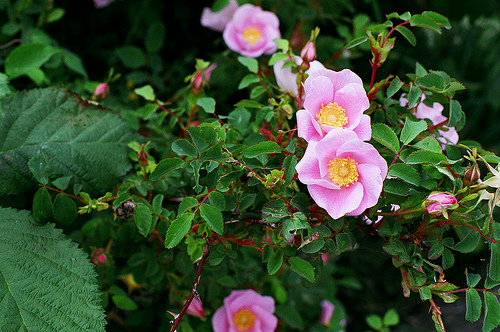

In [ ]:
PIL.Image.open(str(roses[1]))

# Read flowers images from disk into numpy array using opencv

In [ ]:
flowers_image_dict = {
    'roses': list (data_dir.glob('roses/*')),
    'daisy': list (data_dir.glob('daisy/*')),
    'dandelion': list (data_dir.glob('dandelion/*')),
    'sunflowers': list (data_dir.glob('sunflowers/*')),
    'tulips': list (data_dir.glob('tulips/*')),
}

In [ ]:
flowers_image_dict['daisy']

[PosixPath('datasets/flower_photos/daisy/2087343668_ef4fb95787_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/169371301_d9b91a2a42.jpg'),
 PosixPath('datasets/flower_photos/daisy/6299498346_b9774b6500.jpg'),
 PosixPath('datasets/flower_photos/daisy/1441939151_b271408c8d_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/11834945233_a53b7a92ac_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/8383753520_8391dd80ee_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/517054463_036db655a1_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/5435522104_1d6a61b431_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/7189043225_2fe781439a_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/6148728633_27afc47b0c_m.jpg'),
 PosixPath('datasets/flower_photos/daisy/9244082319_b1f7e2d8b0_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/10437929963_bc13eebe0c.jpg'),
 PosixPath('datasets/flower_photos/daisy/10555826524_423eb8bf71_n.jpg'),
 PosixPath('datasets/flower_photos/daisy/5626895440_97a0ec04c2_n.jpg'

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

array([[[ 39,  20, 129],
        [ 38,  19, 128],
        [ 37,  19, 132],
        ...,
        [ 12,   8, 114],
        [ 16,   5, 115],
        [ 30,  10, 133]],

       [[ 13,   4, 114],
        [ 14,   5, 116],
        [ 17,   8, 119],
        ...,
        [  0,   0, 104],
        [  9,   6, 116],
        [ 10,   2, 119]],

       [[  1,   4, 108],
        [  3,   3, 109],
        [  4,   4, 110],
        ...,
        [  0,   3, 106],
        [  0,   0, 110],
        [  0,   4, 116]],

       ...,

       [[  9,   0,  90],
        [  5,   0,  86],
        [  3,   0,  84],
        ...,
        [ 82,  32, 164],
        [ 84,  34, 166],
        [ 86,  35, 169]],

       [[  0,   0,  83],
        [  1,   0,  84],
        [  2,   0,  84],
        ...,
        [ 83,  33, 165],
        [ 86,  36, 168],
        [ 89,  36, 170]],

       [[  0,   3,  86],
        [  0,   3,  86],
        [  0,   2,  86],
        ...,
        [ 85,  35, 167],
        [ 89,  36, 169],
        [ 91,  38, 172]]], dtype=uint8)
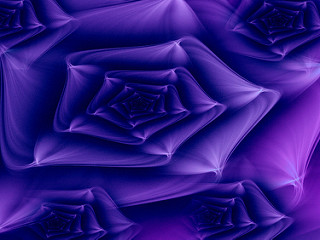

In [ ]:
img = cv2.imread(str(flowers_image_dict['roses'][0]))
img

In [ ]:
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
x,y = [],[]
for flower_name,images in flowers_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    x.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
x = np.array(x)
y = np.array(y)

# Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [ ]:
len(x_train)

2752

# Preprocessing: scale images

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_train_scaled[0]

array([[[0.45098039, 0.50196078, 0.67843137],
        [0.35686275, 0.40392157, 0.57647059],
        [0.4745098 , 0.57254902, 0.74117647],
        ...,
        [0.20784314, 0.19607843, 0.30588235],
        [0.32941176, 0.3372549 , 0.48235294],
        [0.26666667, 0.26666667, 0.37254902]],

       [[0.60784314, 0.71372549, 0.91372549],
        [0.47843137, 0.55294118, 0.73333333],
        [0.37254902, 0.38431373, 0.51372549],
        ...,
        [0.2745098 , 0.29411765, 0.39607843],
        [0.34117647, 0.34509804, 0.49411765],
        [0.40392157, 0.43921569, 0.56470588]],

       [[0.67843137, 0.81176471, 0.91372549],
        [0.40784314, 0.4745098 , 0.65098039],
        [0.43921569, 0.49803922, 0.69411765],
        ...,
        [0.2745098 , 0.30588235, 0.44705882],
        [0.32941176, 0.35686275, 0.50196078],
        [0.27843137, 0.28235294, 0.39215686]],

       ...,

       [[0.4627451 , 0.57254902, 0.67058824],
        [0.34901961, 0.44705882, 0.48627451],
        [0.3372549 , 0

# Build convolutional neural network and train it

In [ ]:
model = Sequential([
    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(5)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

model.fit(x_train_scaled,y_train,epochs = 30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.3937 - loss: 1.3604
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.6163 - loss: 0.9610
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7022 - loss: 0.7875
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7888 - loss: 0.5536
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8882 - loss: 0.3396
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9315 - loss: 0.2098
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9642 - loss: 0.1344
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9910 - loss: 0.0399
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9923 - loss: 0.0356
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9979 - loss: 0.0079
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9963 - loss: 0.0131
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy:

In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6631 - loss: 2.6762


[2.7293357849121094, 0.6633986830711365]


*Here we see that while train accuracy is very high (100%), the test accuracy is significantly low (66.31%) indicating overfitting. Let's make some predictions before we use data augmentation to address overfitting*

In [ ]:
predictions = model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


array([[ -5.0394235 ,  14.623912  ,   3.8753479 ,  -9.423702  ,
          2.2537775 ],
       [  3.1754577 ,  -4.099455  ,   2.230653  ,  -3.6480875 ,
         -5.8569813 ],
       [  1.4150707 , -12.2137165 ,   7.354895  ,   2.9563196 ,
         -2.6500278 ],
       ...,
       [  1.727822  ,  -9.730106  ,  -9.3621235 ,   9.230094  ,
          3.7573166 ],
       [  6.6471605 ,  -4.8465548 , -13.608462  , -16.673992  ,
         17.02369   ],
       [ -9.077147  ,  -2.6617675 ,   0.34983528,  12.439536  ,
         -1.8983301 ]], dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[1])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([7.1908534e-01, 4.9811078e-04, 2.7954841e-01, 7.8226207e-04,
       8.5909647e-05], dtype=float32)>

In [ ]:
np.argmax(score)

0

In [ ]:
y_test[1]

0

# Improve Test Accuracy Using Data Augmentation

In [ ]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal",
                      input_shape=(180,
                                   180,
                                   3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Original Image

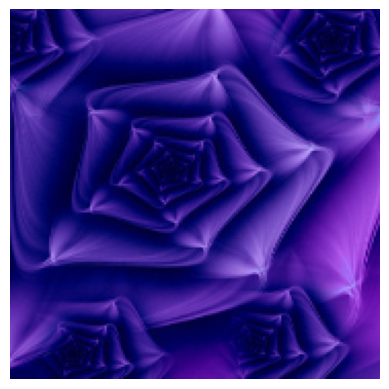

In [ ]:
plt.axis('off')
plt.imshow(x[0])

Newly generated training sample using data augmentation

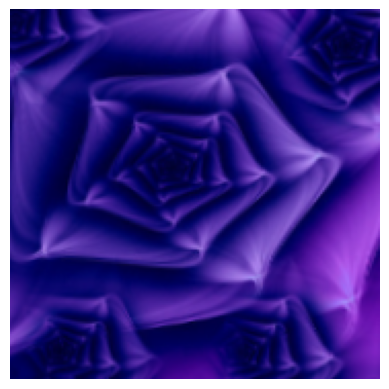

In [ ]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

# Train the model using data augmentation and a drop out layer

In [ ]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding = 'same',activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0,2),

    layers.Flatten(),
    layers.Dense(128,activation = 'relu'),
    layers.Dense(5)
])

model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

model.fit(x_train_scaled,y_train,epochs = 30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.3580 - loss: 1.4784
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5647 - loss: 1.0869
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6432 - loss: 0.9399
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6888 - loss: 0.8231
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6738 - loss: 0.8344
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7092 - loss: 0.7634
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7263 - loss: 0.7477
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.7642 - loss: 0.6406
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7398 - loss: 0.6770
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7704 - loss: 0.5991
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.7622 - loss: 0.6226
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy:

In [ ]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7394 - loss: 0.8167


[0.8652077913284302, 0.7244008779525757]

***You can see that by using data augmentation and drop out layer the accuracy of test set predictions is increased to 73.94%***

In [ ]:
predictions = model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[-0.09065483,  7.993426  , -0.98529124, -6.5607324 , -0.10646748],
       [ 1.4032018 ,  1.1274304 ,  1.8936824 , -4.510069  , -2.1972694 ],
       [-1.3823152 , -9.781544  ,  8.850692  , -4.320354  , -2.202283  ],
       ...,
       [ 2.6095583 , -2.3121667 , -2.6876273 ,  3.5005593 ,  6.6457543 ],
       [ 5.34791   ,  3.7389176 , -1.421525  , -3.8376315 ,  6.615545  ],
       [ 1.8587363 , -0.32137027,  0.37830308, 10.55398   , -0.507198  ]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.0818232e-04, 9.9926192e-01, 1.2597146e-04, 4.7740696e-07,
       3.0334736e-04], dtype=float32)>

In [ ]:
np.argmax(score)

1

In [ ]:
y_test[0]

1